In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [332]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

In [333]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


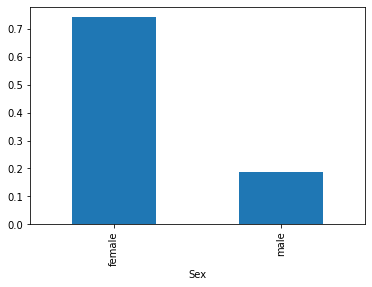

In [334]:
df = train.groupby('Sex').mean()['Survived']
df.plot(kind='bar')
plt.show()

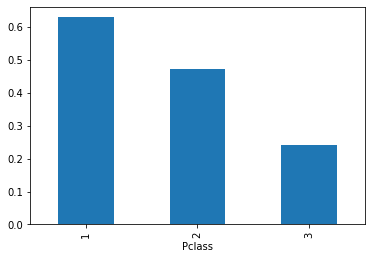

In [335]:
df = train.groupby('Pclass').mean()['Survived']
df.plot(kind='bar')
plt.show()

In [336]:
train.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], inplace=True, axis=1)

In [337]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [338]:
train.dropna(inplace=True)

In [339]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [340]:
for i in train.index:
  if train.loc[i, 'Sex']=='male':
    train.loc[i,'Sex']=1
  else:
    train.loc[i,'Sex']=0

In [341]:
target = np.ravel(train.Survived)

In [342]:
train.drop(['Survived'], inplace=True, axis=1)
train = train.astype(float)

In [343]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train, target, test_size=0.2, random_state=42)

In [344]:
train_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
328,3.0,0.0,31.0,1.0,1.0,20.5250
73,3.0,1.0,26.0,1.0,0.0,14.4542
253,3.0,1.0,30.0,1.0,0.0,16.1000
719,3.0,1.0,33.0,0.0,0.0,7.7750
666,2.0,1.0,25.0,0.0,0.0,13.0000


In [345]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 328 to 130
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  571 non-null    float64
 1   Sex     571 non-null    float64
 2   Age     571 non-null    float64
 3   SibSp   571 non-null    float64
 4   Parch   571 non-null    float64
 5   Fare    571 non-null    float64
dtypes: float64(6)
memory usage: 31.2 KB


In [346]:
model=keras.Sequential()
model.add(keras.layers.Dense(32, activation='relu', input_shape=(6,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [347]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_scaled, train_target, batch_size=4, epochs=70, verbose=1)

Epoch 1/70
143/143 [==============================] - 1s 2ms/step - loss: 0.7265 - accuracy: 0.6445
Epoch 2/70
143/143 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7005
Epoch 3/70
143/143 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7058
Epoch 4/70
143/143 [==============================] - 0s 2ms/step - loss: 0.5767 - accuracy: 0.7338
Epoch 5/70
143/143 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7145
Epoch 6/70
143/143 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7145
Epoch 7/70
143/143 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.7373
Epoch 8/70
143/143 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.7426
Epoch 9/70
143/143 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.7426
Epoch 10/70
143/143 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7303

In [348]:
model.evaluate(val_scaled,val_target, batch_size=4)

36/36 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.8112


[0.4750111699104309, 0.811188817024231]

In [349]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [350]:
test.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], inplace=True, axis=1)
test.dropna(inplace=True)
for i in test.index:
  if test.loc[i, 'Sex']=='male':
    test.loc[i,'Sex']=1
  else:
    test.loc[i,'Sex']=0
test = test.astype(float)

In [351]:
model.predict(test, verbose=1)

11/11 [==============================] - 0s 2ms/step


array([[8.98084641e-02],
       [2.17372119e-01],
       [3.28522623e-02],
       [9.04205143e-02],
       [4.86062318e-01],
       [1.62387013e-01],
       [4.74243402e-01],
       [4.62317765e-02],
       [6.21242464e-01],
       [3.36257815e-02],
       [1.88964218e-01],
       [9.43303585e-01],
       [1.85301304e-02],
       [9.62208033e-01],
       [8.49258304e-01],
       [7.76969492e-02],
       [9.95525718e-02],
       [3.69180560e-01],
       [3.80479962e-01],
       [2.59790391e-01],
       [4.44994628e-01],
       [2.52594411e-01],
       [7.36554146e-01],
       [3.15765440e-02],
       [9.38229084e-01],
       [1.02295458e-01],
       [2.75294691e-01],
       [2.80915201e-02],
       [5.37557900e-02],
       [3.46763909e-01],
       [4.43007231e-01],
       [9.91541147e-02],
       [6.19939685e-01],
       [7.73067772e-02],
       [3.99883687e-02],
       [6.91750348e-02],
       [7.59646416e-01],
       [9.45347369e-01],
       [9.68950391e-02],
       [2.24030048e-01],


In [352]:
prediction = list(model.predict(test))
submission = pd.DataFrame({
    "Pclass": test["Pclass"],
    "Sex" : test["Sex"],
    "Age" : test["Age"],
    "Parch" : test["Parch"],
    "Fare" : test["Fare"],
    "Survived" : prediction
})
submission.to_csv('submission.csv', index=False)